In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
# set version
version = "CIFARNet-CIFAR10"

# load metrics
metrics = pd.read_csv(f"lightning_logs/{version}/metrics.csv")

# merge entries on the same epoch
metrics = metrics.groupby("epoch").first()
metrics["dib_0_train"] = metrics["dib_0_train"].ffill()
metrics["dib_0_val"] = metrics["dib_0_val"].ffill()
metrics.to_csv(f"lightning_logs/{version}/merged_metrics.csv")
display(metrics)

# initial legend elements
base_handles = [
    Line2D([], [], color="gray"),
    Line2D([], [], color="gray", linestyle="--"),
]

,dib_0_train,dib_0_val,dib_1_train,dib_1_val,dib_2_train,dib_2_val,dib_3_train,dib_3_val,nc_layer_1_train,nc_layer_1_val,...,nc_layer_2_val,nc_layer_3_train,nc_layer_3_val,nc_output_train,nc_output_val,step,train_acc,train_loss,val_acc,val_loss
epoch,,,,,,,,,,,,,,,,,,,,,
0,0.033516,0.033623,0.035576,0.034385,0.070801,0.071621,2.014375,2.030000,196.569443,201.749481,...,168.358276,186.416931,166.944138,240.012177,140.462891,24,0.345066,1.865625,0.450460,1.509688
1,0.033516,0.033623,0.032681,0.033887,0.065303,0.064648,2.033750,2.021875,171.999390,182.143265,...,120.896637,165.313889,116.703125,193.565781,108.974564,49,0.491150,1.414375,0.513270,1.336563
2,0.033516,0.033623,0.032520,0.031475,0.060596,0.059316,2.033125,2.030625,161.495941,169.644760,...,100.523827,98.193176,85.806404,90.000839,78.815773,74,0.559216,1.225625,0.562564,1.214375
3,0.033516,0.033623,0.030303,0.031655,0.058037,0.055254,2.034375,2.041875,151.580627,160.553650,...,84.064827,66.886650,66.221016,60.589886,63.946087,99,0.626489,1.060781,0.617351,1.082813
4,0.033516,0.033623,0.030610,0.031406,0.056221,0.052148,2.040000,2.036875,147.245743,155.559555,...,78.099533,63.065033,60.635868,54.462280,55.454662,124,0.682832,0.926719,0.641859,1.023906
5,0.033516,0.033623,0.031519,0.028936,0.052197,0.051855,2.046875,2.075625,146.330826,152.007782,...,71.147812,46.222092,52.670052,33.518970,48.541706,149,0.732750,0.797969,0.659188,0.962500
6,0.033516,0.033623,0.030713,0.029536,0.049658,0.050293,2.047500,2.061250,142.848572,149.242996,...,65.061325,41.075474,43.956139,28.345169,38.285587,174,0.766222,0.699219,0.684860,0.898750
7,0.033516,0.033623,0.031040,0.029019,0.047881,0.047393,2.064375,2.078125,140.786331,144.377548,...,61.878292,36.391201,44.365253,20.655746,37.386471,199,0.814879,0.578906,0.679628,0.908906
8,0.033516,0.033623,0.030444,0.028823,0.049092,0.047168,2.066875,2.071250,139.697205,144.819611,...,59.435574,29.122044,36.965263,17.699560,31.023869,224,0.855025,0.491953,0.712566,0.832812


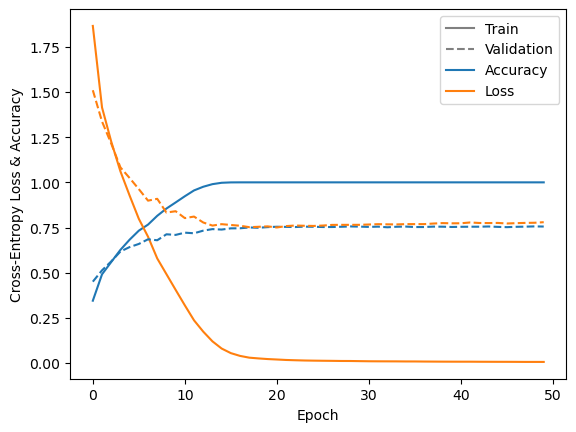

In [3]:
# plot train and val loss and accuracy
train_cols = metrics.filter(like="train_").columns
val_cols = metrics.filter(like="val_").columns
plt.plot(metrics.index, metrics[train_cols])
plt.gca().set_prop_cycle(None)
plt.plot(metrics.index, metrics[val_cols], linestyle="--")
# plt.ylim(0, 1)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss & Accuracy")
plt.legend(
    base_handles + plt.gca().get_lines(), ["Train", "Validation", "Accuracy", "Loss"]
)
plt.show()

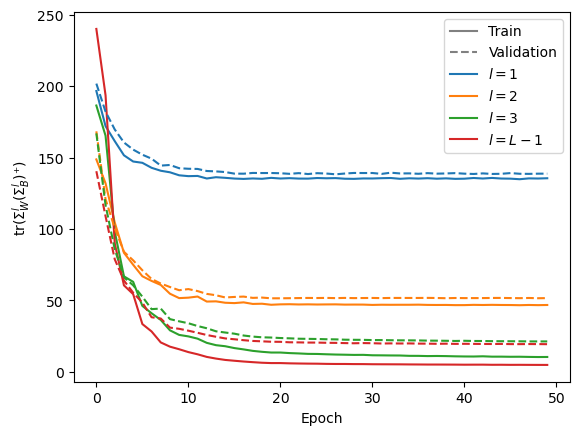

In [4]:
# plot NC1
nc_cols = metrics.filter(like="nc_").columns
train_nc_cols = nc_cols[nc_cols.str.contains("train")]
val_nc_cols = nc_cols[nc_cols.str.contains("val")]
plt.plot(metrics.index, metrics[train_nc_cols])
plt.gca().set_prop_cycle(None)
plt.plot(metrics.index, metrics[val_nc_cols], linestyle="--")
plt.legend(
    base_handles + plt.gca().get_lines(),
    ["Train", "Validation"] + [rf"$l = {layer}$" for layer in (1, 2, 3, "L-1")],
)
plt.xlabel("Epoch")
plt.ylabel(r"$\operatorname{tr}(Σ_W^l(Σ_B^l)⁺)$")
plt.show()

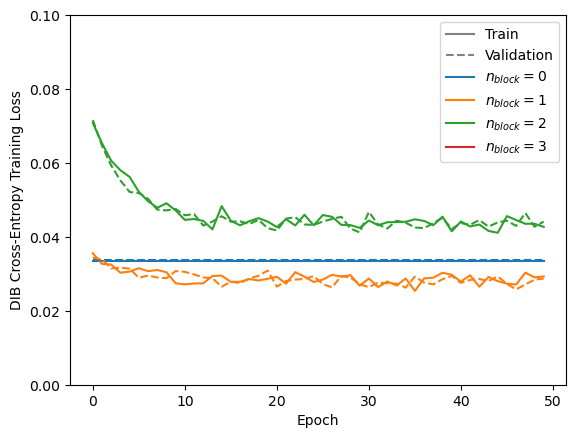

In [6]:
# plot DIB
diff = metrics["dib_0_val"] - metrics["dib_0_train"]
num_epochs = metrics.shape[0]
for i, set in enumerate(("train", "val")):
    dib_cols = metrics.filter(regex=f"dib_[0-9]_{set}").columns
    values = metrics[dib_cols]
    plt.plot(metrics.index, values, linestyle=["-", "--"][i])

    if set == "train":
        plt.gca().set_prop_cycle(None)
        handles = base_handles + plt.gca().get_lines()

plt.xlabel("Epoch")
plt.ylabel("DIB Cross-Entropy Training Loss")
plt.legend(
    handles,
    ["Train", "Validation"] + [rf"$n_{{block}} = {layer}$" for layer in (0, 1, 2, 3)],
)
plt.ylim(0, 0.1)
plt.show()